<a href="https://colab.research.google.com/github/akshpesa/FMML/blob/main/Module_2_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [6]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [8]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

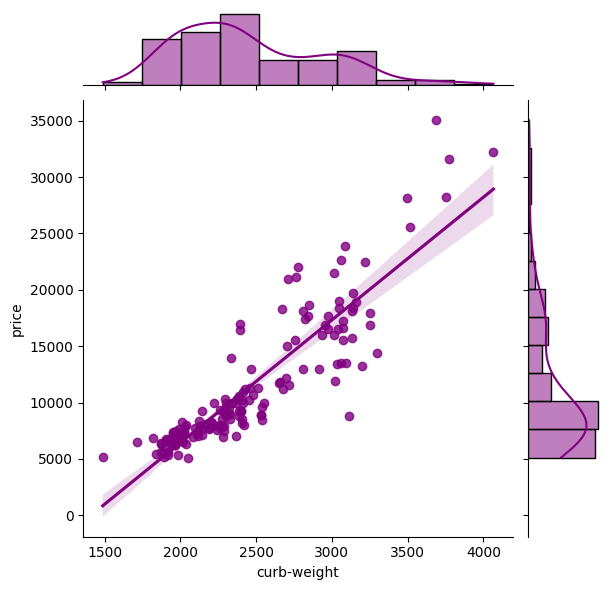

In [10]:
feature = "curb-weight"

# Plotting the jointplot
sns.jointplot(x=pd.to_numeric(X[feature]), y=y, kind="reg", color='purple')
plt.show()

<ipython-input-11-869f3900012f>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature2], ax=axes[1], color='blue', kde=True)


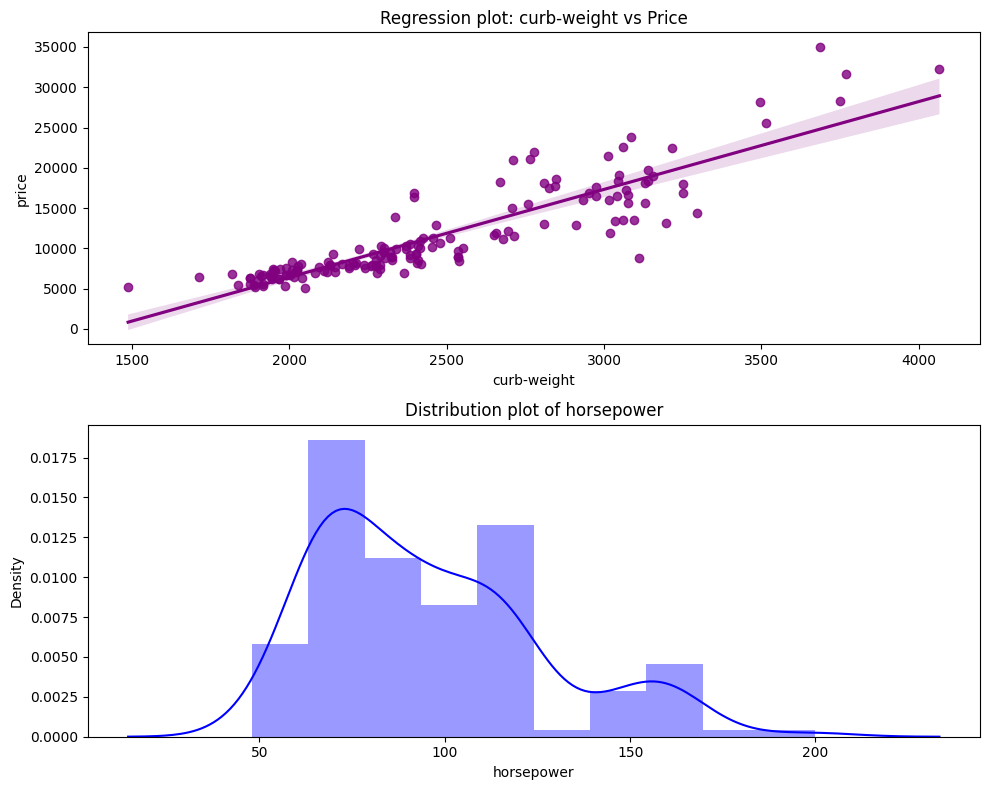

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot: Regression plot
feature1 = "curb-weight"
sns.regplot(x=pd.to_numeric(X[feature1]), y=y, ax=axes[0], color='purple')
axes[0].set_title(f'Regression plot: {feature1} vs Price')

# Second subplot: Distribution plot
feature2 = "horsepower"
sns.distplot(X[feature2], ax=axes[1], color='blue', kde=True)
axes[1].set_title(f'Distribution plot of {feature2}')

# Adjust layout
plt.tight_layout()
plt.show()


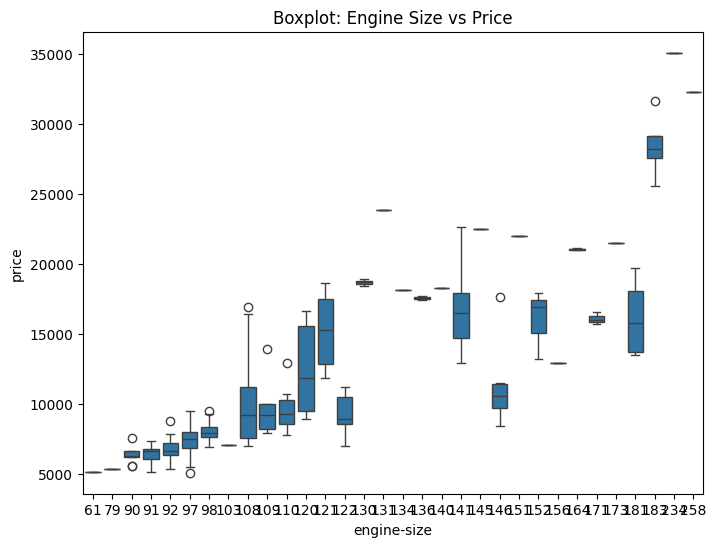

In [12]:
# Seaborn boxplot example for a new plot type
plt.figure(figsize=(8, 6))
sns.boxplot(x=X['engine-size'], y=y)
plt.title('Boxplot: Engine Size vs Price')
plt.show()


Question: Interpret the plot below. List all the interpretations point by point using the plot below.
Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?
Convertible cars are the most expensive.


2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

Hatchback cars are the least expensive.

3) Do you think the body-style of a car can be a good predictor for its price?

The body style can be a good predictor for price, though additional factors would improve the prediction model.